# E Commerce Customer Categorization and Analyzer

## 1: Data Preparation

In [3]:
#Module#01 -> jawad1A
import sys
import pandas as pd
print("Location of Python interpreter:",sys.executable)

#jawad1A1 + jawad1A2
dataset = pd.read_csv('E-Commerce-Customers-data.csv',encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

#jawad1A2
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
print('\nDataframe dimensions:', dataset.shape)
print("\n First 5 Entries")
display(dataset.head(5))

#jawad1A3
print("\n\nmissing values")
col_types = pd.DataFrame(dataset.dtypes).T.rename(index={0: 'column type'})
missing_values = pd.DataFrame(dataset.isnull().sum()).T.rename(index={0: 'total missing'})
missing_percentage = pd.DataFrame((dataset.isnull().sum() / len(dataset)) * 100).T.rename(index={0: 'missing percentage'})
col_info = pd.concat([col_types, missing_values, missing_percentage])
display(col_info)

#jawad1A4
dataset = dataset.dropna()
print('\nDataframe dimensions after dropping missing values:', dataset.shape)
print("\n\nmissing values after dropping missing values")
col_types = pd.DataFrame(dataset.dtypes).T.rename(index={0: 'column type'})
missing_values = pd.DataFrame(dataset.isnull().sum()).T.rename(index={0: 'total missing'})
missing_percentage = pd.DataFrame((dataset.isnull().sum() / len(dataset)) * 100).T.rename(index={0: 'missing percentage'})
col_info = pd.concat([col_types, missing_values, missing_percentage])
display(col_info)

#jawad1A5
duplicates = dataset.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")
dataset = dataset.drop_duplicates()
print('\nDataframe dimensions after removing duplicates:', dataset.shape)
duplicates = dataset.duplicated().sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicates.sum()}")


Location of Python interpreter: C:\Users\mjawa\anaconda3\python.exe

Dataframe dimensions: (541909, 8)

 First 5 Entries


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom



missing values


InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type           object    object      object    int64  datetime64[ns]   
total missing              0         0        1454        0               0   
missing percentage       0.0       0.0    0.268311      0.0             0.0   

                   UnitPrice CustomerID Country  
column type          float64     object  object  
total missing              0     135080       0  
missing percentage       0.0  24.926694     0.0


Dataframe dimensions after dropping missing values: (406829, 8)


missing values after dropping missing values


InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type           object    object      object    int64  datetime64[ns]   
total missing              0         0           0        0               0   
missing percentage       0.0       0.0         0.0      0.0             0.0   

                   UnitPrice CustomerID Country  
column type          float64     object  object  
total missing              0          0       0  
missing percentage       0.0        0.0     0.0


Number of duplicate rows: 5225

Dataframe dimensions after removing duplicates: (401604, 8)

Number of duplicate rows after cleaning: 0


## 2: Exploring the Contents of variables

### Analysis by Countries


No. of countries in the dataframe: 37


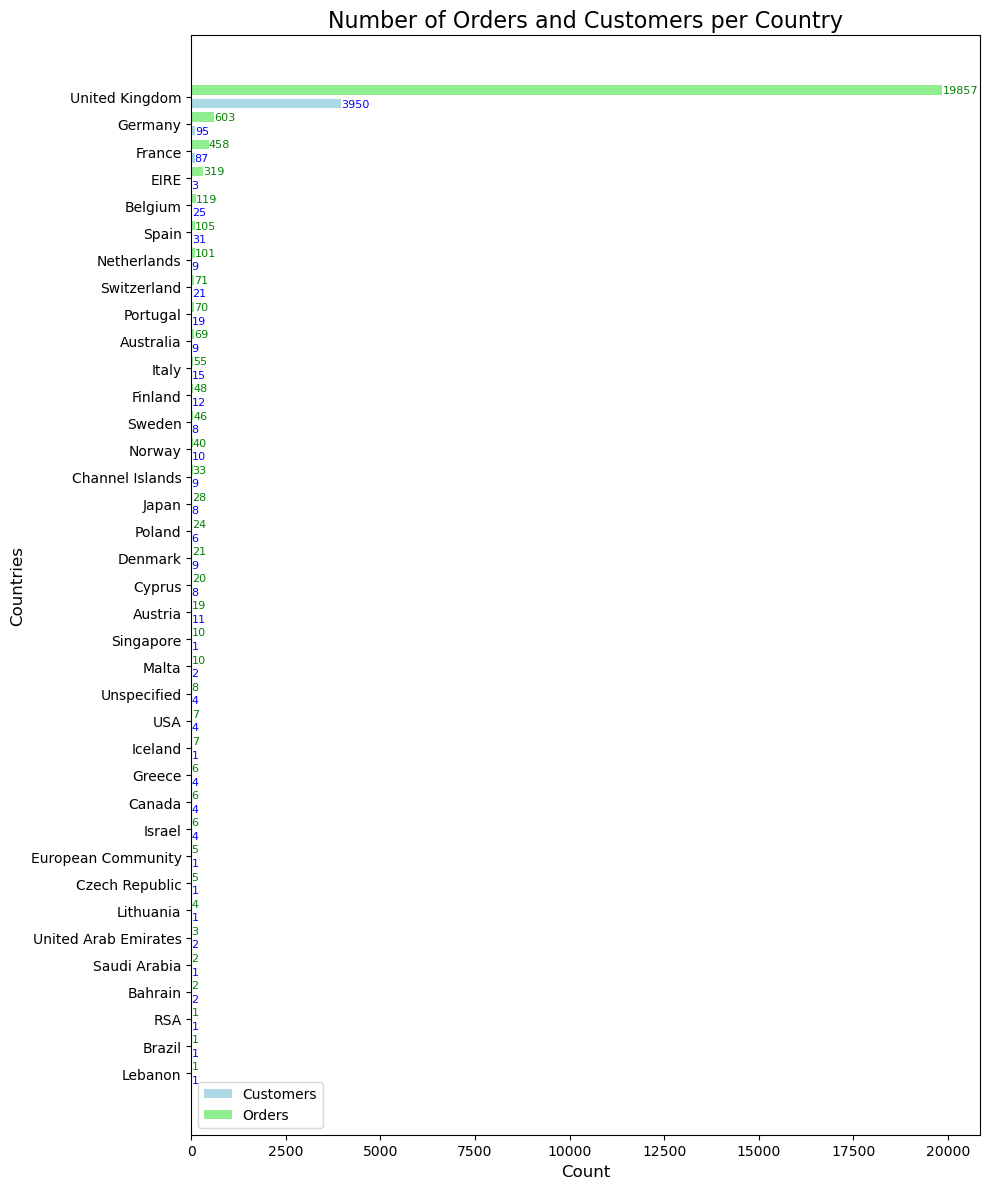

In [6]:
#Module#02 -> jawad2A
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

#jawad2A1
customers_per_country = dataset.groupby('Country')['CustomerID'].nunique()
orders_per_country = dataset.groupby('Country')['InvoiceNo'].nunique()
df = pd.DataFrame({
    'Number of Customers': customers_per_country,
    'Number of Orders': orders_per_country
})
df = df.sort_values(by='Number of Orders')
print(f"No. of countries in the dataframe: {len(df)}")
fig, ax = plt.subplots(figsize=(10, 12))
bar_width = 0.35  
index = np.arange(len(df))  
bars1 = ax.barh(index, df['Number of Customers'], bar_width, color='lightblue', label='Customers')
bars2 = ax.barh(index + 0.5, df['Number of Orders'], bar_width, color='lightgreen', label='Orders')  
for bar, count in zip(bars1, df['Number of Customers']):
    ax.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=8, color='blue')
for bar, count in zip(bars2, df['Number of Orders']):
    ax.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=8, color='green')
ax.set_title('Number of Orders and Customers per Country', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Countries', fontsize=12)
ax.set_yticks(index + 0.25)  
ax.set_yticklabels(df.index)  
ax.legend()
plt.tight_layout()
plt.show()
orders_per_country = dataset.groupby('Country')['InvoiceNo'].nunique().reset_index()
orders_per_country.columns = ['Country', 'Number of Orders']
custom_color_scale = [
    [0, 'rgb(224,255,255)'], 
    [0.001, 'rgb(166,206,227)'],  
    [0.002, 'rgb(31,120,180)'],  
    [0.002, 'rgb(178,223,138)'],  
    [0.05, 'rgb(51,160,44)'], 
    [0.10, 'rgb(251,154,153)'], 
    [0.20, 'rgb(128,0,128)'], 
    [1, 'rgb(255,255,0)']
]

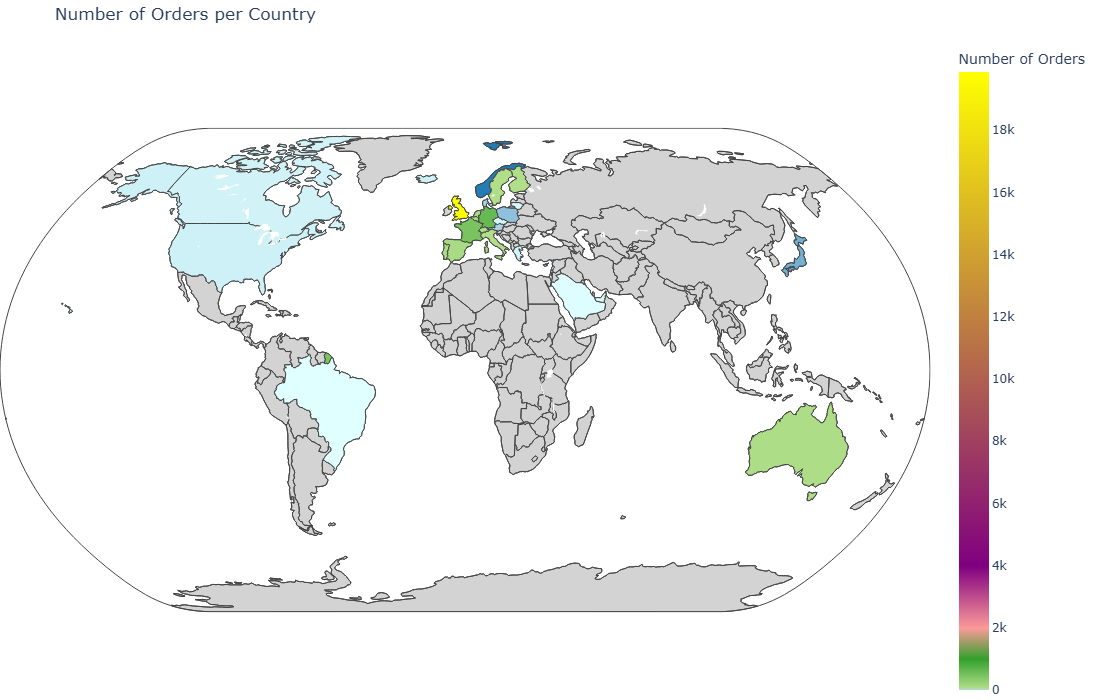

In [9]:
#Under -> Module#02 -> jawad2A
#jawad2A2
fig = px.choropleth(
    orders_per_country, 
    locations="Country", 
    locationmode="country names", 
    color="Number of Orders", 
    hover_name="Country", 
    color_continuous_scale=custom_color_scale, 
    title="Number of Orders per Country"
)
fig.update_geos(
    projection_type="natural earth",  
    showcountries=True,              
    showcoastlines=True,            
    showland=True,                  
    landcolor="lightgrey"            
)
fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},  
    height=700,                        
    width=1000,                        
)
fig.show()

### Customers and products

The dataframe contains `401,604 entries`. What are the number of users and products in these entries?

In [11]:
#Module#03 -> jawad3A
#jawad3A1
pd.DataFrame([{'Products': len(dataset['StockCode'].value_counts()),    
               'Transactions': len(dataset['InvoiceNo'].value_counts()),
               'Customers': len(dataset['CustomerID'].value_counts()),}], 
             columns = ['Products', 'Transactions', 'Customers'], index = ['Quantity'])

Products  Transactions  Customers
Quantity      3684         22190       4372

In [13]:
#jawad3A2
customer_summary = dataset.groupby(by=['CustomerID'], as_index=False).agg(
    Total_Purchases=('InvoiceNo', 'nunique'),  
    Total_Quantity=('Quantity', 'sum')       
)
customer_summary = customer_summary.sort_values('CustomerID', ascending=True)
display(customer_summary.head(10)) 

CustomerID  Total_Purchases  Total_Quantity
0      12346                2               0
1      12347                7            2458
2      12348                4            2341
3      12349                1             631
4      12350                1             197
5      12352               11             470
6      12353                1              20
7      12354                1             530
8      12355                1             240
9      12356                3            1591

The first lines of this list shows Quantity **0** this indicates transactions that has been canceled.


In [16]:
#Module#03 -> jawad3A2
print("Our Top 10 highr Purchases Customers")
customer_summary = dataset.groupby(by=['CustomerID'], as_index=False).agg(
    Total_Purchases=('InvoiceNo', 'nunique'), 
    Total_Quantity=('Quantity', 'sum')        
)
customer_summary = customer_summary.sort_values('Total_Quantity', ascending=False)
display(customer_summary.head(10))  

Our Top 10 highr Purchases Customers


CustomerID  Total_Purchases  Total_Quantity
1703      14646               77          196719
55        12415               26           77242
1895      14911              248           77155
3758      17450               55           69009
4233      18102               62           64122
3801      17511               46           63012
1005      13694               60           61899
1447      14298               45           58021
1345      14156               66           56908
3202      16684               31           49390

### Cancell orders

In [18]:
display(dataset.sort_values('CustomerID')[:5])

InvoiceNo StockCode                         Description  Quantity  \
61619     541431     23166      MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624    C541433     23166      MEDIUM CERAMIC TOP STORAGE JAR    -74215   
286623    562032     22375   AIRLINE BAG VINTAGE JET SET BROWN         4   
72260     542237     84991         60 TEATIME FAIRY CAKE CASES        24   
14943     537626     22772  PINK DRAWER KNOB ACRYLIC EDWARDIAN        12   

               InvoiceDate  UnitPrice CustomerID         Country  
61619  2011-01-18 10:01:00       1.04      12346  United Kingdom  
61624  2011-01-18 10:17:00       1.04      12346  United Kingdom  
286623 2011-08-02 08:48:00       4.25      12347         Iceland  
72260  2011-01-26 14:30:00       0.55      12347         Iceland  
14943  2010-12-07 14:57:00       1.25      12347         Iceland

The existence of entries with the prefix `C` for the `InvoiceNo` this indicates transactions that have been canceled.

In [20]:
#Module#04 -> jawad4A
#jawad4A1
cancelled_orders = dataset[dataset['InvoiceNo'].str.startswith('C')]
total_orders = dataset['InvoiceNo'].nunique()
cancelled_count = cancelled_orders['InvoiceNo'].nunique()
print(f"Number of total orders: {total_orders}")
print(f"Number of cancelled orders: {cancelled_count}")
percentage_cancelled = (cancelled_count / total_orders) * 100
print(f"Percentage of cancelled orders: {percentage_cancelled:.2f}%")
display(cancelled_orders)

Number of total orders: 22190
Number of cancelled orders: 3654
Percentage of cancelled orders: 16.47%


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50      14527  United Kingdom  
154    2010-12-01 09:49:00       4.65      15311  United Kingdom  
235    2010-12-01 10:24:00       1.65      17548  United Kingdom  
236    2010-12-01 10:24:00       0.29      17548  United Kingdom  
237    2010-12-01 10:24:00       0.29      17548  United Kingdom  
...                    ...        ...        ...             ...  
540449 2011-12-09 09:57:00       0.83      14397  United Kingdom  
541541 2011-12-09 10:28:00     224.69      15498  United Kingdom  
541715 2011-12-09 11:57:00      10.95      15311  United Kingdom  
541716 2011-12-09 11:58:00       1.25      17315  United Kingdom  
541717 2011-12-09 11:58:00       1.25      17315  United Kingdom  

[8872 rows x 8 columns]

### StockCode

Above, it has been seen that some values of the `StockCode` variable indicate a particular transaction (i.e. `D for Discount`). let's check the contents of this variable by looking for the set of codes that would contain only letters:

In [23]:
#Module#05 -> jawad5A
#jawad5A1
list_special_codes = dataset[dataset['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [25]:
#Under Module#05 -> jawad5A
#jawad5A2
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, dataset[dataset['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


### Basket Price

Will create a `new variable` that indicates the `total price of every purchase`:

In [27]:
#Module#06 -> jawad6A
#jawad6A1
dataset['TotalPrice']=dataset['Quantity']*dataset['UnitPrice']
print("Our Top 10 Customers")
customer_summary = dataset.groupby(by=['CustomerID'], as_index=False).agg(
    Total_Purchases=('InvoiceNo', 'nunique'),  
    Total_Quantity=('Quantity', 'sum') ,     
    Total_Price=('TotalPrice', 'sum')       
)

#jawad6A2
customer_summary = customer_summary.sort_values('Total_Price', ascending=False)
display(customer_summary.head(10))  

Our Top 10 Customers


CustomerID  Total_Purchases  Total_Quantity  Total_Price
1703      14646               77          196719    279489.02
4233      18102               62           64122    256438.49
3758      17450               55           69009    187322.17
1895      14911              248           77155    132458.73
55        12415               26           77242    123725.45
1345      14156               66           56908    113214.59
3801      17511               46           63012     88125.38
3202      16684               31           49390     65892.08
1005      13694               60           61899     62690.54
2192      15311              118           37673     59284.19

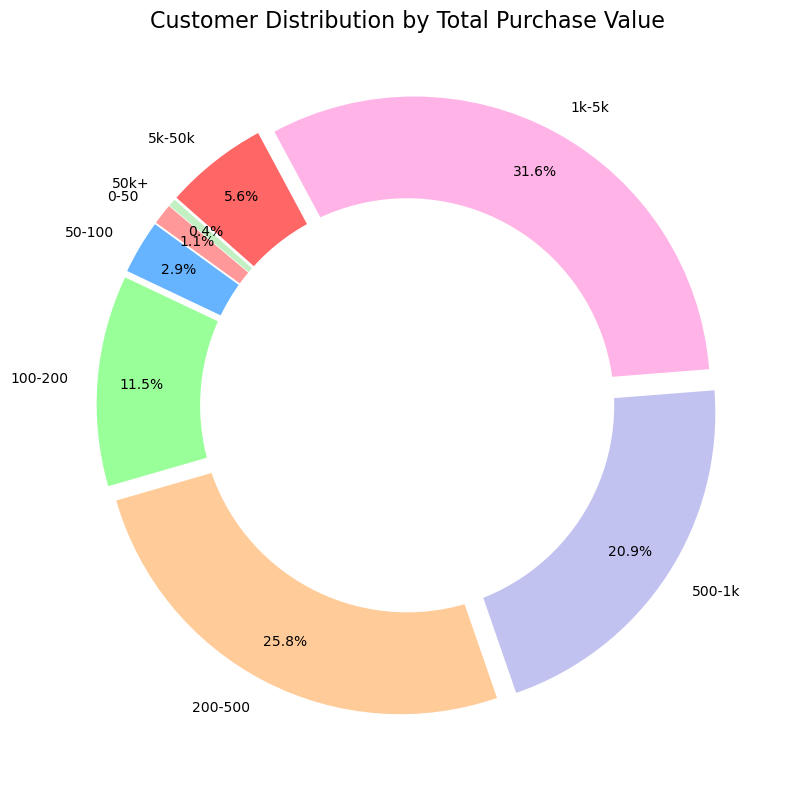

In [29]:
#Module#07 -> jawad7A
#jawad7A1
import matplotlib.pyplot as plt
bins = [0, 50, 100, 200, 500, 1000, 5000, 50000, float('inf')] 
labels = ['0-50', '50-100', '100-200', '200-500','500-1k','1k-5k', '5k-50k', '50k+']  
customer_summary['Price_Category'] = pd.cut(customer_summary['Total_Price'], bins=bins, labels=labels, right=False)
category_counts = customer_summary['Price_Category'].value_counts().sort_index()
category_percentages = (category_counts / category_counts.sum()) * 100

#jawad7A2
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2'] 
explode = [0.05] * len(category_percentages)
plt.pie(
    category_percentages, 
    labels=category_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    pctdistance=0.85
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Customer Distribution by Total Purchase Value', fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
category_counts

Price_Category
0-50         49
50-100      127
100-200     499
200-500    1118
500-1k      907
1k-5k      1368
5k-50k      244
50k+         18
Name: count, dtype: int64

## 3: Products Description

### Keywords

In [35]:
#Module#08 -> jawad8A
#jawad8A1
total_words = dataset['Description'].apply(lambda x: len(str(x).split())).sum()
print(f"Total number of words in the 'Description' column: {total_words}")
unique_words = set(" ".join(dataset['Description'].dropna()).split())
total_unique_words = len(unique_words)
list_words=unique_words
print(f"Total number of unique words in the 'Description' column: {total_unique_words}")

Total number of words in the 'Description' column: 1763761
Total number of unique words in the 'Description' column: 2250


In [36]:
#Under Module#08 -> jawad8A
#jawad8A2
from collections import Counter
import re
descriptions = " ".join(dataset['Description'].dropna()).lower()
descriptions = re.sub(r'[^a-z\s]', '', descriptions)  
words = descriptions.split()
word_counts = Counter(words)
total_unique_words = len(word_counts)
print(f"Total keywords: {total_unique_words}")
word_counts

Total keywords: 2106


Counter({'set': 47385,
         'of': 41471,
         'bag': 38090,
         'red': 32254,
         'heart': 29375,
         'retrospot': 26754,
         'vintage': 25761,
         'design': 23663,
         'pink': 20264,
         'christmas': 19082,
         'box': 18146,
         'cake': 16372,
         'white': 16178,
         'metal': 15739,
         'jumbo': 15587,
         'lunch': 14980,
         'blue': 13902,
         'hanging': 13025,
         'holder': 12854,
         'sign': 12682,
         'pack': 11987,
         'tlight': 11415,
         'paper': 10827,
         'small': 10441,
         'card': 10080,
         'wooden': 10067,
         'cases': 9461,
         'glass': 9125,
         'tea': 8862,
         'polkadot': 8852,
         'decoration': 8636,
         'spaceboy': 8611,
         'bottle': 8585,
         'in': 8456,
         'and': 7909,
         'home': 7901,
         'hot': 7881,
         'pantry': 7670,
         'large': 7587,
         'tin': 7539,
         'wate

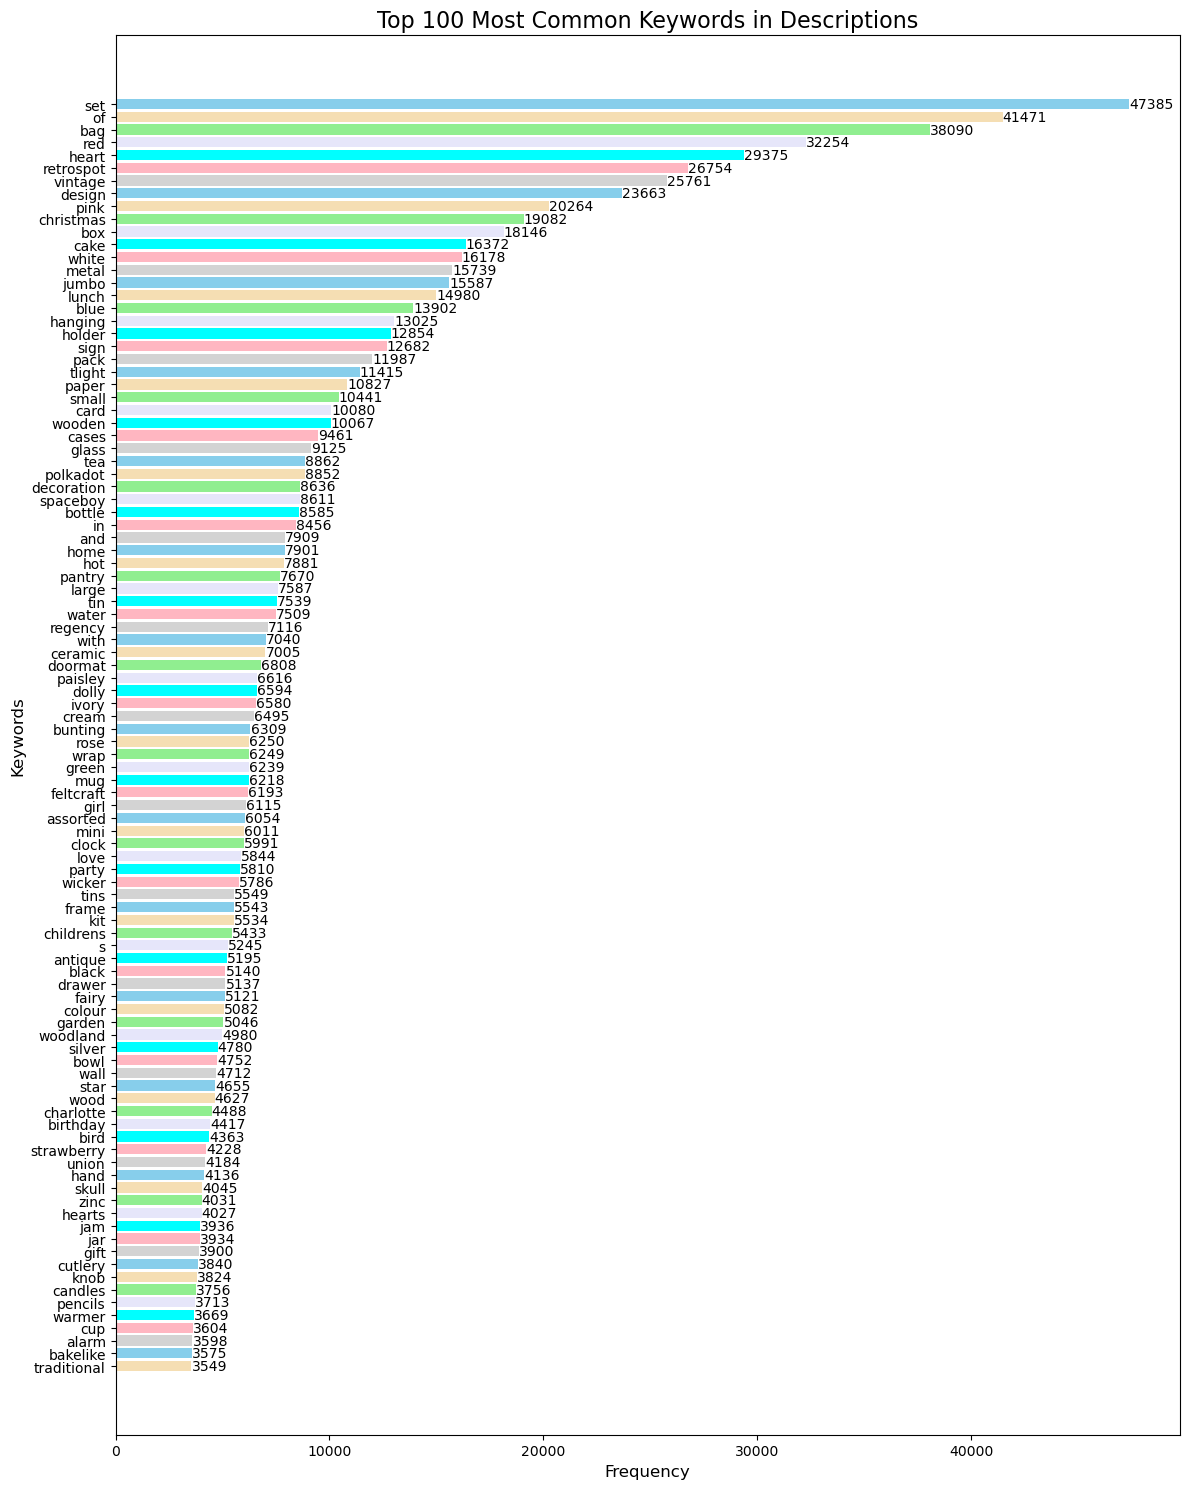

In [37]:
#Under Module#08 -> jawad8A
#jawad8A3
import matplotlib.pyplot as plt
from collections import Counter
import re
top_100_words = word_counts.most_common(100)
words, counts = zip(*top_100_words)
#jawad8A4
colors = ['skyblue', 'wheat', 'lightgreen', 'lavender', 'Aqua', 'lightpink', 'lightgray']  
bar_colors = [colors[i % len(colors)] for i in range(len(words))]
plt.figure(figsize=(12, 15))
bars = plt.barh(words, counts, color=bar_colors)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keywords', fontsize=12)
plt.title('Top 100 Most Common Keywords in Descriptions', fontsize=16)
plt.gca().invert_yaxis() 
for bar, count in zip(bars, counts):
    plt.text(
        bar.get_width() + 1,  
        bar.get_y() + bar.get_height() / 2,  
        str(count),            
        va='center',         
        fontsize=10,         
        color='black'         
    )
plt.tight_layout()
plt.show()

### Categorical Keywords

The list that was obtained contains more than `1400 keywords` and the `most frequent` ones appear in more than `200 products`. However, while examinating the content of the list, I noticed that some names doesn't `depict any information`. Others do not carry enough information, like `colors`. Therefore, I'll discard these words from the analysis that follows.

In [42]:
#Module#9 -> jawad9A
#jawad9A1
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
nltk.download('averaged_perceptron_tagger')
descriptions = dataset['Description'].dropna().tolist()
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_matrix = tfidf.fit_transform(descriptions)
tfidf_keywords = tfidf.get_feature_names_out()
tfidf_frequencies = tfidf_matrix.sum(axis=0).A1
keywords_with_freq = list(zip(tfidf_keywords, tfidf_frequencies))
stop_words = {'pink', 'blue', 'green', 'orange', 'tag', 'red'}  
filtered_keywords = [
    (word, freq) for word, freq in keywords_with_freq
    if word not in stop_words and len(word) >= 3 and not bool(re.search(r'\d', word))
]
pos_tags = nltk.pos_tag([word for word, _ in filtered_keywords])
category_keywords = [
    (word, freq) for (word, freq), (word_pos, tag) in zip(filtered_keywords, pos_tags)
    if tag.startswith('NN')  
]
category_keywords.sort(key=lambda x: x[1], reverse=True)
print("Total Categorical Keywords:",len(category_keywords))
print("Refined Categorical Keywords:")
for keyword, freq in category_keywords:
    print(f"{keyword}: {freq}")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mjawa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Total Categorical Keywords: 187
Refined Categorical Keywords:
set: 17920.538047142556
bag: 15924.837613297987
heart: 12521.306927096728
retrospot: 12223.547052361158
vintage: 11251.405054756398
design: 9714.163300781209
metal: 8655.874213482692
box: 8621.612398811834
christmas: 8605.288033067014
sign: 7666.536577806468
lunch: 7502.024831339033
cake: 6685.151180598999
holder: 6128.041055572321
pack: 5608.959231997891
paper: 5240.94553660635
glass: 4980.075188656418
pantry: 4686.459580532208
spaceboy: 4622.4469183408355
doormat: 4552.8109710768495
bottle: 4287.504143065913
tin: 4248.156218520388
cases: 4232.512261678444
mug: 4007.821990618543
wrap: 3827.89271425745
water: 3753.869513625468
party: 3674.069341048369
regency: 3590.9750327852166
cream: 3509.105162013254
ivory: 3465.5421271215105
mini: 3449.2858835939346
wicker: 3433.0062035766914
home: 3306.6553444433735
frame: 3244.327803645802
girl: 3125.3742893154194
clock: 3104.9300274703987
love: 3059.1336029011927
garden: 2951.84016444

### Data encoding

Now I will use these keywords to create groups of product.

In [47]:
#Module#10 -> jawad10A
#jawad10A1
import pandas as pd
liste_produits = dataset['Description'].unique()
display(liste_produits)
X = []
for key, occurence in category_keywords:
    X.append(pd.DataFrame({key: list(map(lambda x: int(key.upper() in x), liste_produits))}))
X = pd.concat(X, axis=1)
X

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

set  bag  heart  retrospot  vintage  design  metal  box  christmas  \
0       0    0      1          0        0       0      0    0          0   
1       0    0      0          0        0       0      1    0          0   
2       0    0      1          0        0       0      0    0          0   
3       0    0      0          0        0       0      0    0          0   
4       0    0      1          0        0       0      0    0          0   
...   ...  ...    ...        ...      ...     ...    ...  ...        ...   
3891    0    0      0          0        0       0      0    0          0   
3892    0    0      0          0        0       0      0    0          0   
3893    0    0      0          0        0       0      0    0          0   
3894    0    0      1          0        0       0      0    0          0   
3895    0    0      0          0        0       0      0    0          0   

      sign  ...  empire  cakes  bunny  tags  wire  medium  container  gin  \
0        0  ...       0      0      0     0     0       0          0    1   
1        0  ...       0      0      0     0     0       0          0    0   
2        0  ...       0      0      0     0     0       0          0    0   
3        0  ...       0      0      0     0     0       0          0    0   
4        0  ...       0      0      0     0     0       0          0    0   
...    ...  ...     ...    ...    ...   ...   ...     ...        ...  ...   
3891     0  ...       0      0      0     0     0       0          0    0   
3892     0  ...       0      0      0     0     0       0          0    0   
3893     0  ...       0      0      0     0     0       0          0    0   
3894     0  ...       0      0      0     0     0       0          0    1   
3895     0  ...       0      0      0     0     0       0          0    0   

      jars  knack  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  
...    ...    ...  
3891     0      0  
3892     0      0  
3893     0      0  
3894     0      0  
3895     0      0  

[3896 rows x 187 columns]

In [49]:
#Under Module#10 -> jawad10A
#jawad10A2
import pandas as pd
threshold = [0, 1, 2, 3, 5, 10]
label_col = ['{}<.<{}'.format(threshold[i], threshold[i+1]) if i < len(threshold) - 1 else '.>{}'.format(threshold[i]) for i in range(len(threshold))]
new_cols = pd.DataFrame(0, index=X.index, columns=label_col)
for i, prod in enumerate(liste_produits):
    prix = dataset[dataset['Description'] == prod]['UnitPrice'].mean()  
    j = 0
    while j < len(threshold) and prix > threshold[j]:
        j += 1
    if j > 0: 
        new_cols.loc[i, label_col[j-1]] = 1
X = pd.concat([X, new_cols], axis=1)
print(X.head())

   set  bag  heart  retrospot  vintage  design  metal  box  christmas  sign  \
0    0    0      1          0        0       0      0    0          0     0   
1    0    0      0          0        0       0      1    0          0     0   
2    0    0      1          0        0       0      0    0          0     0   
3    0    0      0          0        0       0      0    0          0     0   
4    0    0      1          0        0       0      0    0          0     0   

   ...  container  gin  jars  knack  0<.<1  1<.<2  2<.<3  3<.<5  5<.<10  .>10  
0  ...          0    1     0      0      0      0      1      0       0     0  
1  ...          0    0     0      0      0      0      0      1       0     0  
2  ...          0    0     0      0      0      0      0      1       0     0  
3  ...          0    0     0      0      0      0      0      1       0     0  
4  ...          0    0     0      0      0      0      0      1       0     0  

[5 rows x 193 columns]


The  `X  matrix` indicates the words contained in the description.

In [53]:
#Under Module#10 -> jawad10A
#jawad10A3
print("{:<8} {:<20} \n".format('range', 'no. products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i], threshold[i+1])
    col_sum = X[col].sum()
    if isinstance(col_sum, pd.Series): 
        col_sum = col_sum.sum()
    print("{:<10}  {:<20}".format(col, int(col_sum)))

range    no. products         
--------------------
0<.<1       965                 
1<.<2       1013                
2<.<3       674                 
3<.<5       611                 
5<.<10      476                 
.>10        157                 


### Creating clusters of products

In this section, I will group the products into different classes.
In order to define (approximately) the number of clusters that best represents the data, I use the `silhouette score`:

#### K-Means Clustering & silhouette_score

In [57]:
#Module#11 -> jawad11A
#jawad11A1
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
matrix = X.values  
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.12826217521096547
For n_clusters = 4 The average silhouette_score is : 0.1600374758891481
For n_clusters = 5 The average silhouette_score is : 0.185030831739071
For n_clusters = 6 The average silhouette_score is : 0.17221882230717497
For n_clusters = 7 The average silhouette_score is : 0.20387376524975115
For n_clusters = 8 The average silhouette_score is : 0.18651722889467062
For n_clusters = 9 The average silhouette_score is : 0.15701592243344187


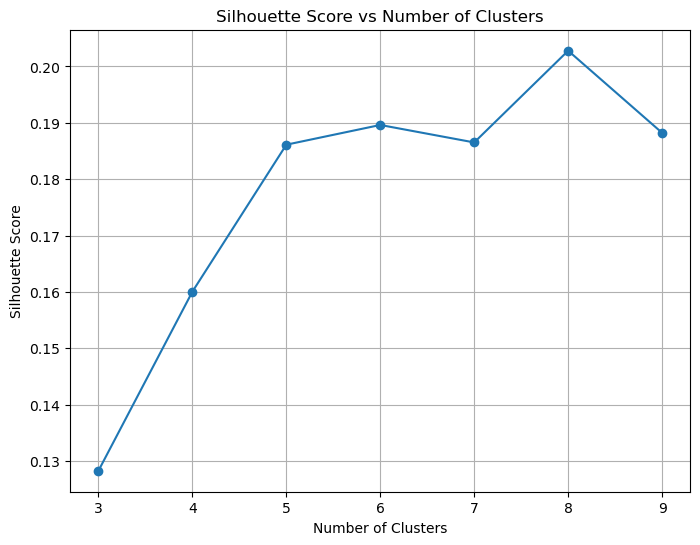

In [59]:
#Under Module#11 -> jawad11A
#jawad11A2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
matrix = X.values 
sil_scores = []
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    sil_scores.append(silhouette_avg)
plt.figure(figsize=(8, 6))
plt.plot(range(3, 10), sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [60]:
#Module#11 -> jawad11A
#jawad11A3
n_clusters = 5
silhouette_avg = -1 
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.18611347783779264


In [62]:
X

set  bag  heart  retrospot  vintage  design  metal  box  christmas  \
0       0    0      1          0        0       0      0    0          0   
1       0    0      0          0        0       0      1    0          0   
2       0    0      1          0        0       0      0    0          0   
3       0    0      0          0        0       0      0    0          0   
4       0    0      1          0        0       0      0    0          0   
...   ...  ...    ...        ...      ...     ...    ...  ...        ...   
3891    0    0      0          0        0       0      0    0          0   
3892    0    0      0          0        0       0      0    0          0   
3893    0    0      0          0        0       0      0    0          0   
3894    0    0      1          0        0       0      0    0          0   
3895    0    0      0          0        0       0      0    0          0   

      sign  ...  container  gin  jars  knack  0<.<1  1<.<2  2<.<3  3<.<5  \
0        0  ...          0    1     0      0      0      0      1      0   
1        0  ...          0    0     0      0      0      0      0      1   
2        0  ...          0    0     0      0      0      0      0      1   
3        0  ...          0    0     0      0      0      0      0      1   
4        0  ...          0    0     0      0      0      0      0      1   
...    ...  ...        ...  ...   ...    ...    ...    ...    ...    ...   
3891     0  ...          0    0     0      0      1      0      0      0   
3892     0  ...          0    0     0      0      1      0      0      0   
3893     0  ...          0    0     0      0      1      0      0      0   
3894     0  ...          0    1     0      0      0      0      1      0   
3895     0  ...          0    0     0      0      0      0      1      0   

      5<.<10  .>10  
0          0     0  
1          0     0  
2          0     0  
3          0     0  
4          0     0  
...      ...   ...  
3891       0     0  
3892       0     0  
3893       0     0  
3894       0     0  
3895       0     0  

[3896 rows x 193 columns]

In [63]:
pd.Series(clusters).value_counts()

1    1013
2     965
4     674
0     633
3     611
Name: count, dtype: int64

In [64]:
#Module#11 -> jawad11A
#jawad11A4
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import colormaps
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        y_lower = y_upper + 10

C:\Users\mjawa\AppData\Local\Temp\ipykernel_7768\3133668829.py:28: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



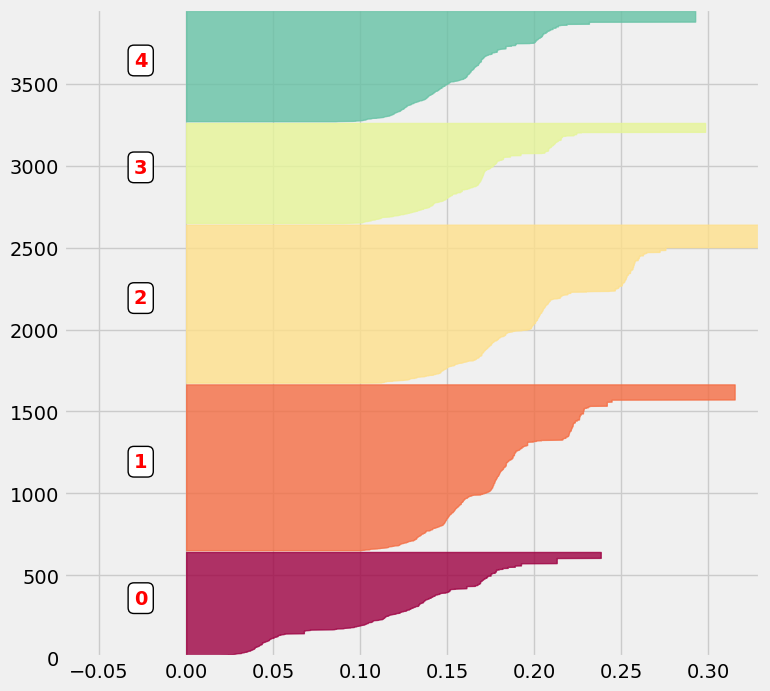

In [65]:
#Module#11 -> jawad11A
#jawad11A5
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

#### Word Cloud

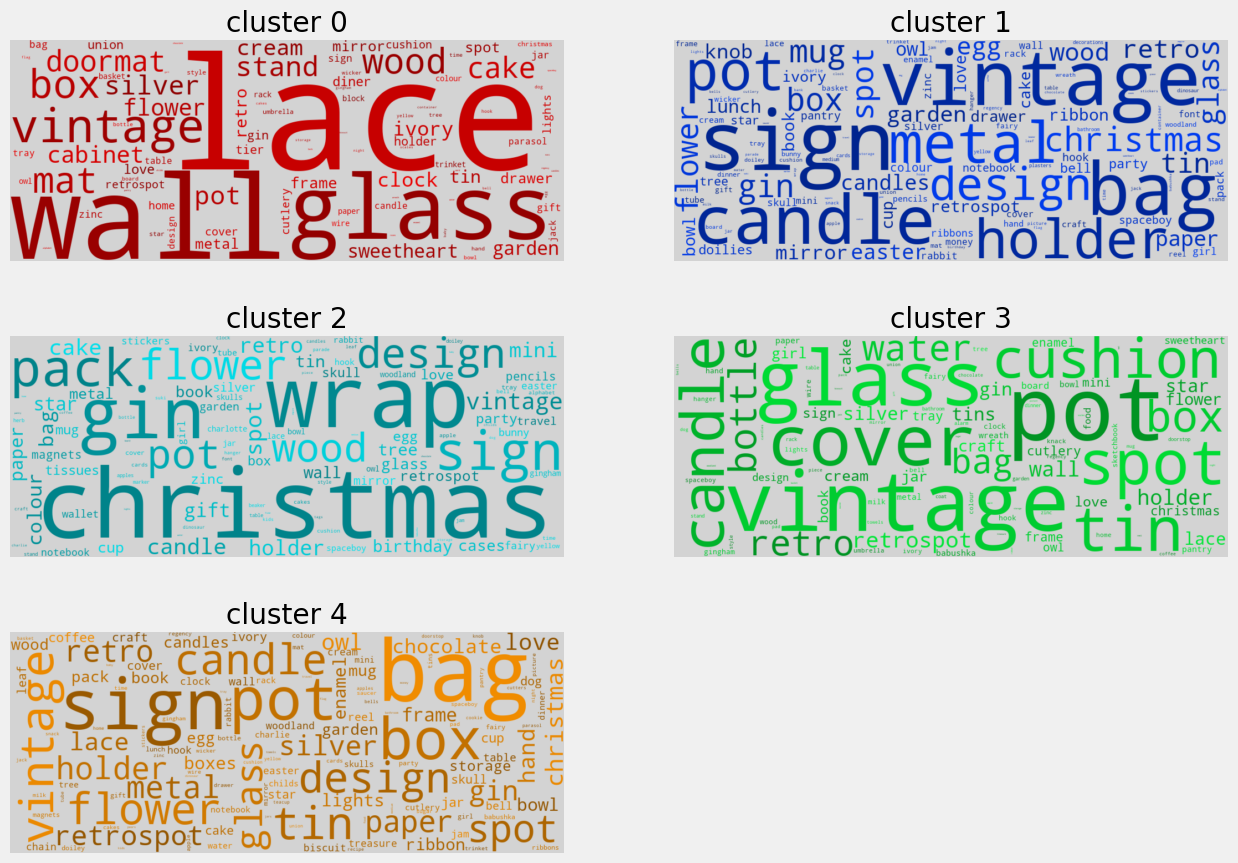

In [68]:
#Under Module#12 -> jawad12A
#jawad12A1
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in category_keywords]
occurence = [dict() for _ in range(n_clusters)]
for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))
from wordcloud import WordCloud
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster {}'.format(increment-1))
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]
    tone = color[i] 
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

From the above representation, we can see that for example, one of the clusters contains objects that could be associated with `gifts` 
* (`keywords: Birthday, candle, cake, ...`). 
Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

## 4: Customer categories


`Formatting data`

In the previous section, the different `products` were grouped in `five clusters`. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable `categ_product` where I indicate the cluster of each product:

In [72]:
#Module#13 -> jawad13A
#jawad13A1
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 
#jawad13A2
dataset['categ_product'] = dataset.loc[:, 'Description'].map(corresp) 
for i in range(5):
    col = f'categ_{i}'        
    df_temp = dataset[dataset['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * df_temp['Quantity']
    price_temp = price_temp.apply(lambda x: x if x > 0 else 0).astype(float) 
    dataset[col] = 0.0 
    dataset.loc[df_temp.index, col] = price_temp 
    dataset[col] = dataset[col].fillna(0.0)
dataset[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']]

InvoiceNo                          Description  categ_product  categ_0  \
0         536365   WHITE HANGING HEART T-LIGHT HOLDER              4      0.0   
1         536365                  WHITE METAL LANTERN              3      0.0   
2         536365       CREAM CUPID HEARTS COAT HANGER              3      0.0   
3         536365  KNITTED UNION FLAG HOT WATER BOTTLE              3      0.0   
4         536365       RED WOOLLY HOTTIE WHITE HEART.              3      0.0   
...          ...                                  ...            ...      ...   
541904    581587          PACK OF 20 SPACEBOY NAPKINS              2      0.0   
541905    581587         CHILDREN'S APRON DOLLY GIRL               4      0.0   
541906    581587        CHILDRENS CUTLERY DOLLY GIRL               3      0.0   
541907    581587      CHILDRENS CUTLERY CIRCUS PARADE              3      0.0   
541908    581587        BAKING SET 9 PIECE RETROSPOT               3      0.0   

        categ_1  categ_2  categ_3  categ_4  
0           0.0      0.0     0.00     15.3  
1           0.0      0.0    20.34      0.0  
2           0.0      0.0    22.00      0.0  
3           0.0      0.0    20.34      0.0  
4           0.0      0.0    20.34      0.0  
...         ...      ...      ...      ...  
541904      0.0     10.2     0.00      0.0  
541905      0.0      0.0     0.00     12.6  
541906      0.0      0.0    16.60      0.0  
541907      0.0      0.0    16.60      0.0  
541908      0.0      0.0    14.85      0.0  

[401604 rows x 8 columns]

I decided to create the `categ_N` variables (with  `N[0:4]` ) that contains the `amount spent in each product category`:

In [76]:
#jawad13A3
temp = dataset.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})
for i in range(5):
    col = 'categ_{}'.format(i)
    temp = dataset.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price[col] = temp[col]  
dataset['InvoiceDate_int'] = dataset['InvoiceDate'].astype('int64')
temp = dataset.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
dataset.drop('InvoiceDate_int', axis=1, inplace=True)
basket_price['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price = basket_price.sort_values('CustomerID', ascending=True)
basket_price

CustomerID InvoiceNo  Basket Price  categ_0   categ_1  categ_2  categ_3  \
0          12346    541431      77183.60     0.00  77183.60     0.00     0.00   
2          12347    537626        711.79   124.44    187.20    23.40   293.35   
3          12347    542237        475.39    38.25    130.50    84.34   169.20   
4          12347    549222        636.25    38.25    330.90    81.00   115.00   
5          12347    556201        382.52    19.90     74.40    41.40   168.76   
...          ...       ...           ...      ...       ...      ...      ...   
22177      18283    557956        192.80     0.00     62.80    43.34    17.40   
22186      18283    580872        208.00     0.00     61.90    27.07     0.00   
22188      18287    570715       1001.32     0.00    386.44   256.84    32.00   
22187      18287    554065        765.28    34.00    540.90    40.68    15.00   
22189      18287    573167         70.68     0.00     45.00    25.68     0.00   

       categ_4                   InvoiceDate  
0         0.00 2011-01-18 10:01:00.000000000  
2        83.40 2010-12-07 14:57:00.000000000  
3        53.10 2011-01-26 14:29:59.999999744  
4        71.10 2011-04-07 10:43:00.000000000  
5        78.06 2011-06-09 13:01:00.000000000  
...        ...                           ...  
22177    69.26 2011-06-23 19:20:00.000000000  
22186   119.03 2011-12-06 12:02:00.000000000  
22188   326.04 2011-10-12 10:23:00.000000000  
22187   134.70 2011-05-22 10:39:00.000000000  
22189     0.00 2011-10-28 09:29:00.000000000  

[18532 rows x 9 columns]

In [77]:
basket_price.head(10)

CustomerID InvoiceNo  Basket Price  categ_0  categ_1  categ_2  categ_3  \
0       12346    541431      77183.60     0.00  77183.6     0.00     0.00   
2       12347    537626        711.79   124.44    187.2    23.40   293.35   
3       12347    542237        475.39    38.25    130.5    84.34   169.20   
4       12347    549222        636.25    38.25    330.9    81.00   115.00   
5       12347    556201        382.52    19.90     74.4    41.40   168.76   
6       12347    562032        584.91   136.05    109.7    61.30   158.16   
7       12347    573511       1294.32   132.10    203.3   154.30   368.72   
8       12347    581180        224.82    30.00    100.8    38.58     0.00   
12      12348    568172        310.00    40.00    270.0     0.00     0.00   
11      12348    548955        367.00    40.00    310.0    17.00     0.00   

    categ_4                   InvoiceDate  
0      0.00 2011-01-18 10:01:00.000000000  
2     83.40 2010-12-07 14:57:00.000000000  
3     53.10 2011-01-26 14:29:59.999999744  
4     71.10 2011-04-07 10:43:00.000000000  
5     78.06 2011-06-09 13:01:00.000000000  
6    119.70 2011-08-02 08:48:00.000000000  
7    435.90 2011-10-31 12:25:00.000000000  
8     55.44 2011-12-07 15:52:00.000000000  
12     0.00 2011-09-25 13:13:00.000000000  
11     0.00 2011-04-05 10:47:00.000000000

In [78]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2010-12-01 08:26:00 -> 2011-12-09 12:50:00


In [79]:
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
comparison_date = datetime.datetime(2011, 10, 1)
set_training = basket_price[basket_price['InvoiceDate'] < comparison_date]
set_test = basket_price[basket_price['InvoiceDate'] >= comparison_date]
basket_price = set_training.copy(deep=True)
transactions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:, col] = basket_price.groupby(by=['CustomerID'])[col].sum() / transactions_per_user['sum'] * 100
transactions_per_user.reset_index(drop=False, inplace=True)
first_registration = basket_price.groupby('CustomerID')['InvoiceDate'].min()
last_purchase = basket_price.groupby('CustomerID')['InvoiceDate'].max()
last_date = basket_price['InvoiceDate'].max().date()
test = first_registration.map(lambda x: (last_date - x.date()).days)
test2 = last_purchase.map(lambda x: (last_date - x.date()).days)
transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop=True)
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop=True)
list_cols = ['count', 'min', 'max', 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
selected_customers = transactions_per_user.copy(deep=True)
matrix = selected_customers[list_cols].to_numpy()
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(matrix)

In [81]:
n_clusters = 11  
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
selected_customers['cluster'] = clusters_clients
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print(f'Silhouette score: {silhouette_avg:.3f}')
pca = PCA(n_components=6) 
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = clusters_clients
print(mat.head())

Silhouette score: 0.208
           0         1         2         3         4         5  cluster
0  90.083991  0.201697 -2.482208  1.474483 -7.312644 -1.909781        2
1   0.164014 -0.001496 -0.073892  1.235327  0.458782 -0.093440        0
2   0.144629 -1.573915 -1.657997 -0.734844  0.208002  0.648399        5
3  -0.000245 -1.377445  0.110914 -0.735146 -0.026319 -1.101715        7
4  -0.050404  2.009247 -0.957500 -0.733601  0.730952 -0.088806        9


C:\Users\mjawa\AppData\Local\Temp\ipykernel_7768\4070149956.py:37: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



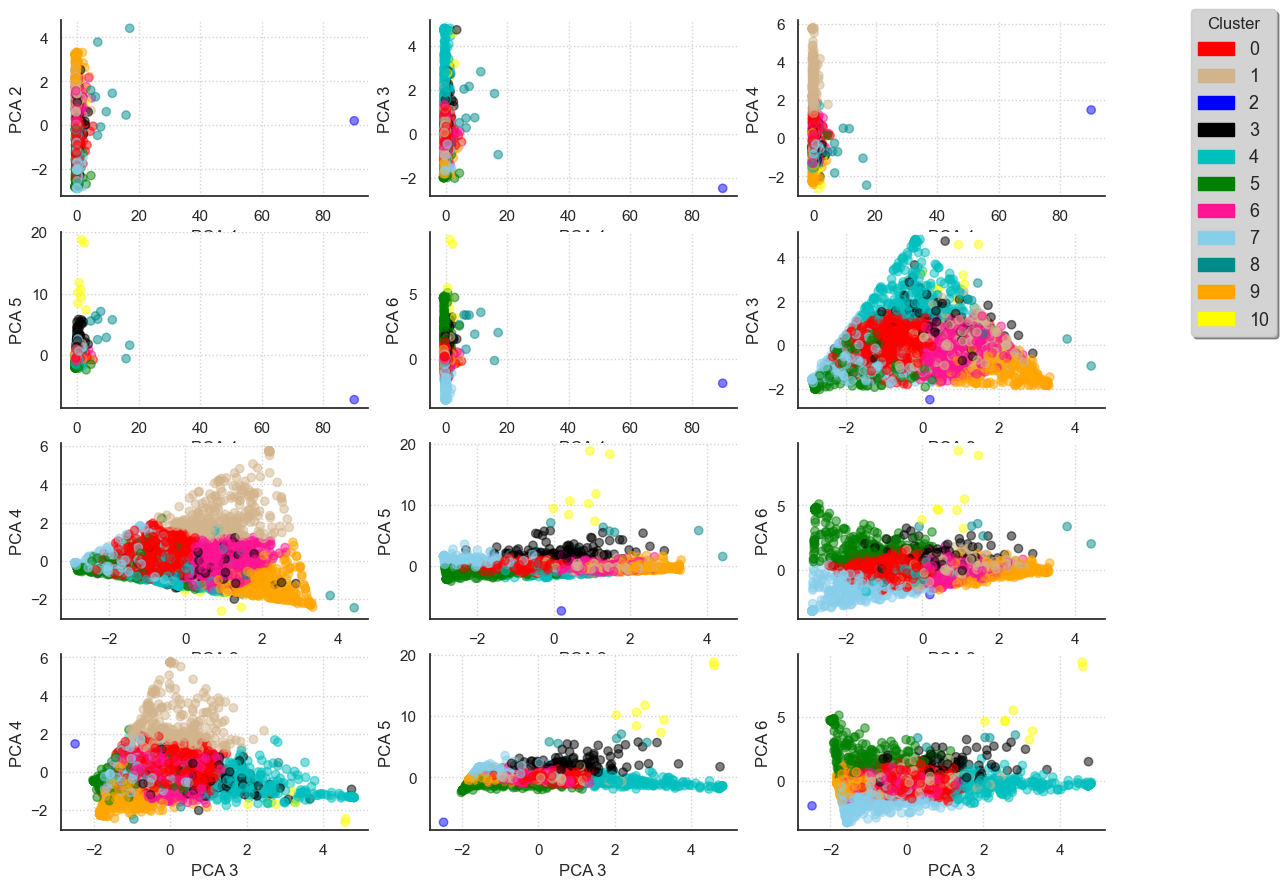

In [86]:
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]
fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        if increment == 12: break
    if increment == 12: break
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))
plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)
plt.tight_layout()

C:\Users\mjawa\AppData\Local\Temp\ipykernel_7768\3133668829.py:28: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



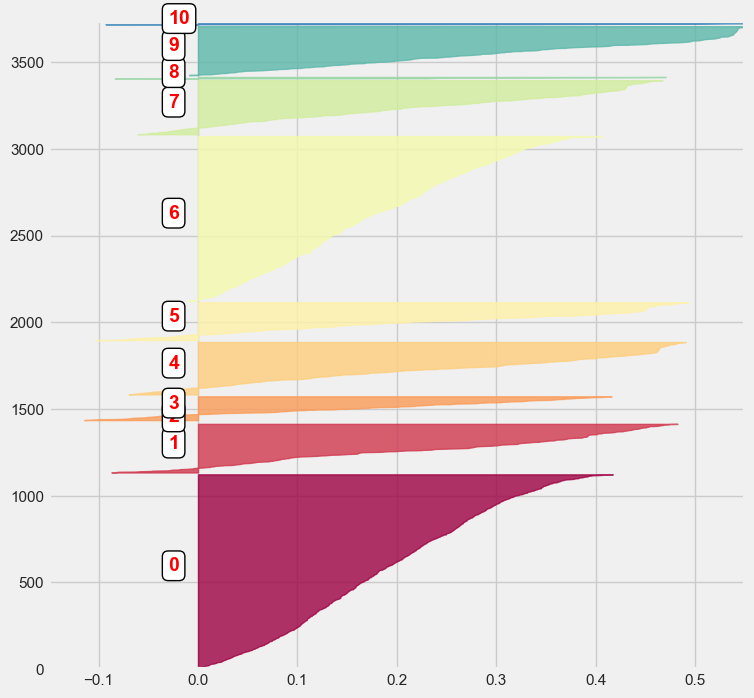

In [87]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

## 5:Classifying customers

### Train X,Y

In [90]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
X = selected_customers[columns]
Y = selected_customers['cluster']
print(X.head())
print(Y.value_counts())

           mean    categ_0     categ_1    categ_2    categ_3    categ_4
0  77183.600000   0.000000  100.000000   0.000000   0.000000   0.000000
1    558.172000  12.787815   29.836681  10.442659  32.408290  14.524555
2    449.310000  20.030714   41.953217  38.016069   0.000000   0.000000
3    334.400000  11.961722   48.444976  11.692584   0.000000  27.900718
4    313.472857  63.830999   15.378866   0.464839  15.526521   4.798775
cluster
0     1114
6      948
7      312
4      303
9      283
1      281
5      219
3      138
8        9
10       8
2        1
Name: count, dtype: int64


In [92]:
category_counts = mat['cluster'].value_counts()
category_counts_df = pd.DataFrame(category_counts).reset_index()
category_counts_df.columns = ['Cluster', 'No. of Customers']
display(category_counts_df)

Cluster  No. of Customers
0         0              1114
1         6               948
2         7               312
3         4               303
4         9               283
5         1               281
6         5               219
7         3               138
8         8                 9
9        10                 8
10        2                 1

In [93]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf  
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    def predict(self, x):
        return self.clf.predict(x)
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator=self.clf, param_grid=parameters, cv=Kfold)
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
    def grid_predict(self, X, Y):
        if not hasattr(self.grid, 'best_estimator_'):
            raise NotFittedError("GridSearchCV is not fitted yet. Please call grid_fit first.")
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100 * accuracy_score(Y, self.predictions)))

In [94]:
X

mean    categ_0     categ_1    categ_2    categ_3    categ_4
0     77183.600000   0.000000  100.000000   0.000000   0.000000   0.000000
1       558.172000  12.787815   29.836681  10.442659  32.408290  14.524555
2       449.310000  20.030714   41.953217  38.016069   0.000000   0.000000
3       334.400000  11.961722   48.444976  11.692584   0.000000  27.900718
4       313.472857  63.830999   15.378866   0.464839  15.526521   4.798775
...            ...        ...         ...        ...        ...        ...
3611    180.600000  34.025471    0.000000   0.000000  24.833887  41.140642
3612     80.820000  41.945063   20.415739  18.708241   0.000000  18.930958
3613    100.210000  25.446562   22.901906  20.516914  13.471709  17.662908
3614    108.683000   2.792525   37.164046  17.204163   8.290165  34.549102
3615    765.280000   4.442818   70.680013   5.315701   1.960067  17.601401

[3616 rows x 6 columns]

In [95]:
Y.value_counts()

cluster
0     1114
6      948
7      312
4      303
9      283
1      281
5      219
3      138
8        9
10       8
2        1
Name: count, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

### Models

    Support Vector Machine Classifier (SVC)
    Logistic regression
    k-Nearest Neighbors
    Decision Tree
    Random Forest

In [99]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(max_iter=20000)
logreg.fit(X_train, Y_train)
predictions = logreg.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.09%


C:\Users\mjawa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



<module 'matplotlib.pyplot' from 'C:\\Users\\mjawa\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

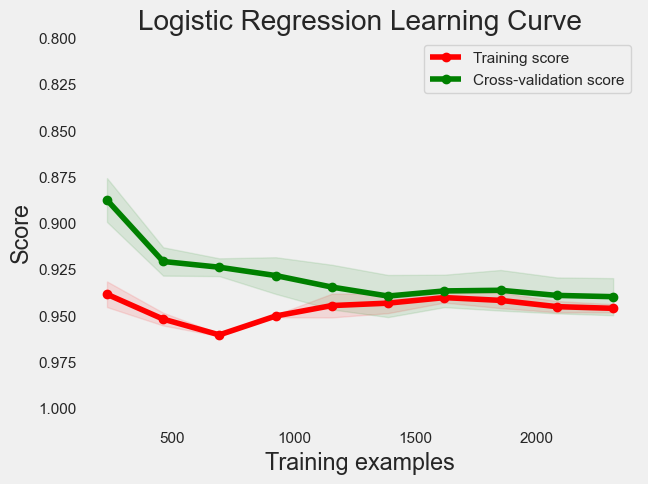

In [101]:
plot_learning_curve(logreg, "Logistic Regression Learning Curve", X_train, Y_train, ylim=[1.01, 0.8], cv=5)

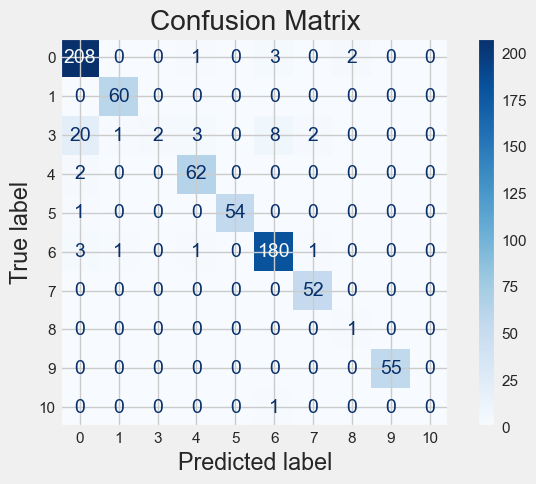

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logreg, X_test, Y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, Y_train)
predictions = knn_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.21%


C:\Users\mjawa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



<module 'matplotlib.pyplot' from 'C:\\Users\\mjawa\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

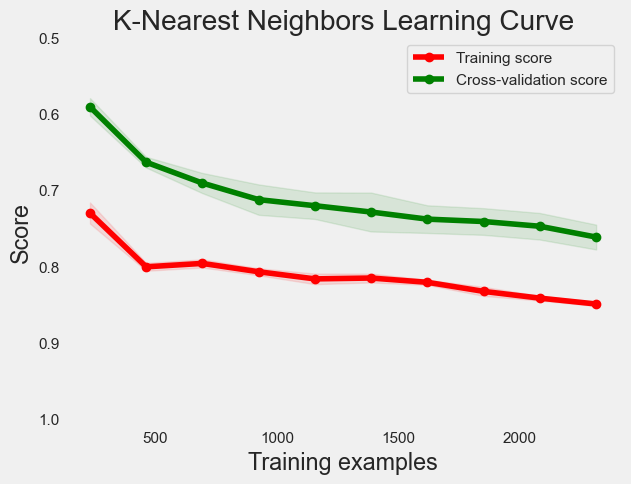

In [104]:
plot_learning_curve(knn_model, "K-Nearest Neighbors Learning Curve", X_train, Y_train, ylim=[1.01, 0.5], cv=5)

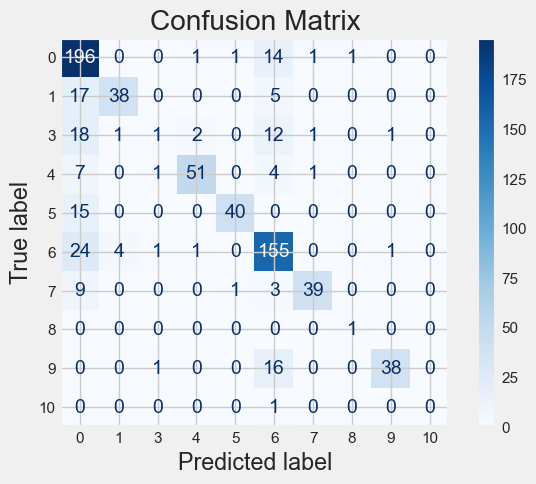

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, Y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0) 
dt_model.fit(X_train, Y_train)
predictions = dt_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.08%


C:\Users\mjawa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



<module 'matplotlib.pyplot' from 'C:\\Users\\mjawa\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

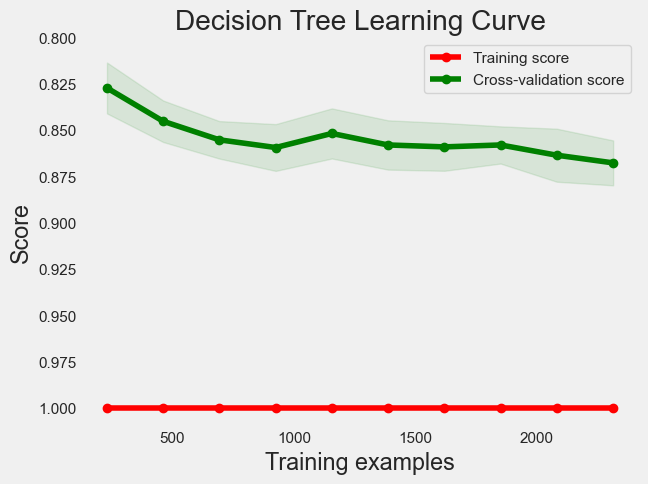

In [107]:
plot_learning_curve(dt_model, "Decision Tree Learning Curve", X_train, Y_train, ylim=[1.01, 0.8], cv=5)

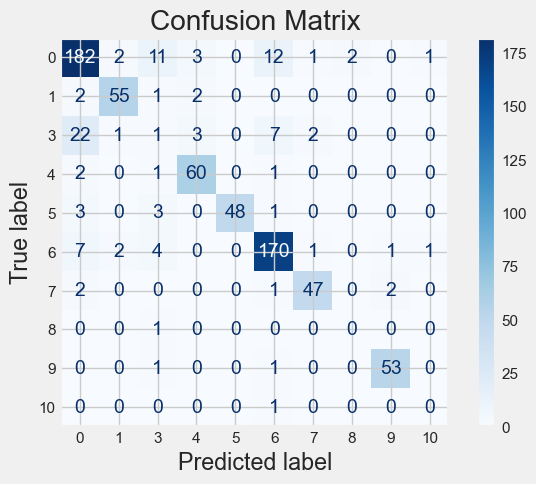

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay\
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, Y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)  
rf_model.fit(X_train, Y_train)
predictions = rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.33%


C:\Users\mjawa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



<module 'matplotlib.pyplot' from 'C:\\Users\\mjawa\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

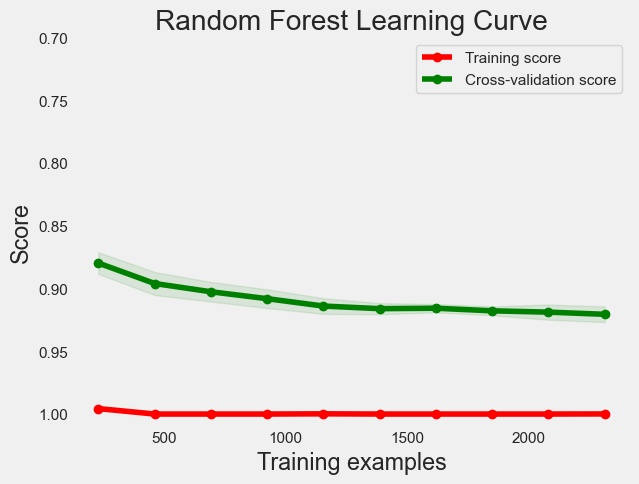

In [110]:
plot_learning_curve(rf_model, "Random Forest Learning Curve", X_train, Y_train, ylim=[1.01, 0.7], cv=5)

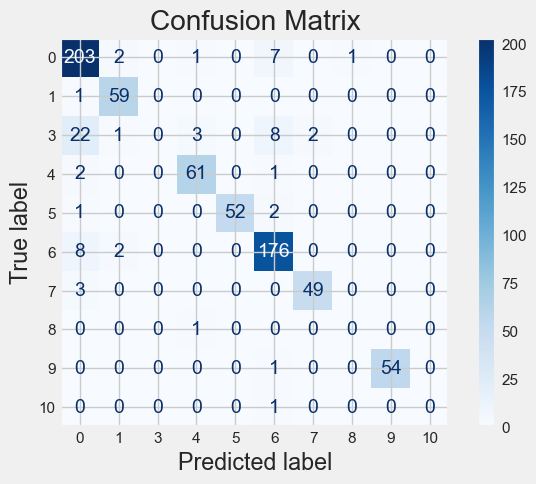

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, Y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [112]:
#time consume
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svc_model = svm.SVC(kernel='linear')  
svc_model.fit(X_train, Y_train)
predictions = svc_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.23%


C:\Users\mjawa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



<module 'matplotlib.pyplot' from 'C:\\Users\\mjawa\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

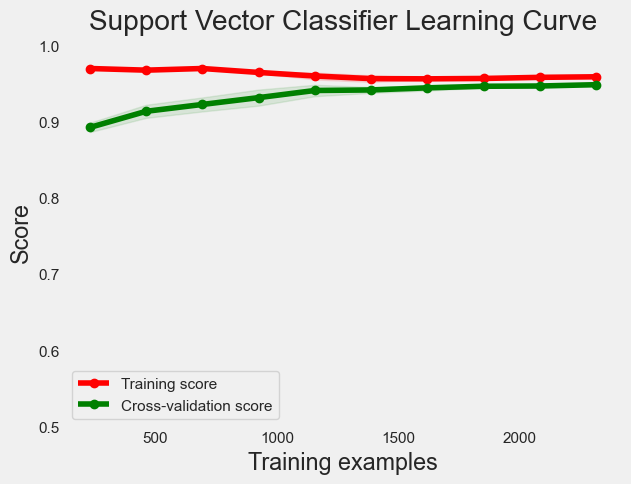

In [113]:
plot_learning_curve(svc_model, "Support Vector Classifier Learning Curve", X_train, Y_train, ylim=[0.5, 1.01], cv=5)

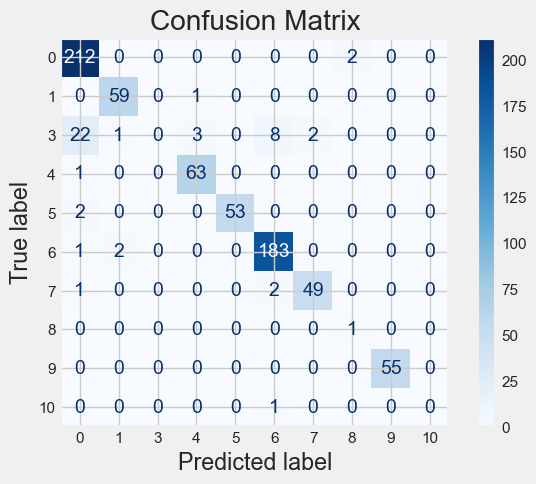

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, Y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## Conclusion:

The analysis and development conducted in this project demonstrate the potential of leveraging purchase data from an e-commerce platform to gain valuable insights into customer behavior and product trends. By grouping products into five main categories and classifying customers into 11 distinct segments based on their purchasing habits, spending patterns, and visit frequencies, the study provides a foundation for predictive modeling. The trained classifiers, utilizing key variables such as average basket amount and category spending percentages, achieved a classification accuracy of 90%, indicating promising results despite potential limitations in the dataset.

The analysis highlights critical areas for improvement, such as addressing seasonal variations in purchasing behavior to refine customer categorization. Expanding the dataset to cover a more extended time frame could significantly enhance the accuracy and robustness of the predictions. Overall, this project demonstrates the viability of customer classification and purchase prediction in e-commerce, paving the way for more personalized marketing strategies and improved customer engagement.

## **Contact and Support**

If you encounter any issues while running the **E-Commerce Customer Categorization and Analyzer** project, or if you have any questions or suggestions, feel free to reach out. I’m happy to help!

### **How to Contact Me:**
- **Email:** [help.jawad@gmail.com](mailto:help.jawad@gmail.com)
- **GitHub Issues:** You can also create an issue directly in the [GitHub repository](https://github.com/JawadAhmadCS/E-Commerce-Customer-Categorization-and-Analyzer) for any bugs or problems you face.
- **LinkedIn:** [My Linkedin](https://www.linkedin.com/in/JawadAhmadCS/)
  
I’ll get back to you as soon as possible to assist with resolving any issues.
